# Project # 1 - Explore Weather Trends
by Steven Melendez - April 9, 2020

## 1 - Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

## 2 - Instructions

Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

* Extract the data from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    * Write a SQL query to extract the city level data. Export to CSV.
    * Write a SQL query to extract the global data. Export to CSV.
    
* Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

* Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

* Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    * Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    * “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    * What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## 3- Task Solution

In order to complete this task, some SQL commands will be used, as well some basic Python commands.

* Results will be documented in section 6.

There are 3 files to pull from the SQL, a good practice is to check the number of table rows.

```SQL
SELECT COUNT(YEAR)
FROM city_data;
```

**Output:** 70792
    
```SQL
SELECT COUNT(CITY)
FROM city_list;
```

**Output:** 342
    
```SQL
SELECT COUNT(YEAR)
FROM global_data;
```

**Output:** 266

Since the outputs didn't show huge rows quantities, I used the * simbol to query 3 tables.

```SQL
SELECT *
FROM city_data;
```

```SQL
SELECT *
FROM global_data;
```

```SQL
SELECT *
FROM city_list;
```

## 4 - Data Preparation

In [2]:
# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for data and visualization
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
import numpy as np# for calculating the moving average!
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load Data
globaltemp = pd.read_csv(r'C:\Users\smele\Documents\Udacity - Data Analyst\Project 1 - Explore Weather Trends\global_data.csv')
citytemp = pd.read_csv(r'C:\Users\smele\Documents\Udacity - Data Analyst\Project 1 - Explore Weather Trends\city_data.csv')

In [4]:
globaltemp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
citytemp.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [6]:
# Check Global Data frame information
globaltemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [7]:
# Check City Data frame information
citytemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
year        70792 non-null int64
city        70792 non-null object
country     70792 non-null object
avg_temp    68245 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [33]:
#create a new reference to the city_data dataframe for the city "San Salvador", which is the closest city from San Jose, Costa Rica.
df_salvador = citytemp[citytemp["city"] == "San Salvador"]

In [34]:
df_salvador.head()

,year,city,country,avg_temp
57146,1837,San Salvador,El Salvador,24.48
57147,1838,San Salvador,El Salvador,24.21
57148,1839,San Salvador,El Salvador,24.60
57149,1840,San Salvador,El Salvador,24.70
57150,1841,San Salvador,El Salvador,24.62


In [44]:
#calculate the mininmal values of "year" and "avg_temp" columns in the global dataframe
print(globaltemp["year"].min())
print(globaltemp["avg_temp"].min())

1750
5.78


In [46]:
#calculate the maximal values of "year" and "avg_temp" columns in the global dataframe
print(globaltemp["year"].max())
print(globaltemp["avg_temp"].max())

2015
9.83


In [47]:
#calculate the mininmal values of "year" and "avg_temp" columns in the df_salvador dataframe
print(df_salvador["year"].min())
print(df_salvador["avg_temp"].min())

1837
24.21


In [48]:
#calculate the maximal values of "year" and "avg_temp" columns in the df_salvador dataframe
print(df_salvador["year"].max())
print(df_salvador["avg_temp"].max())

2013
26.48


## 5 - Data Visualization

In [35]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_salvador["rollingAverage"] = df_salvador["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Salvador dataframe
df_salvador.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
globaltemp["rollingAverage"] = globaltemp["avg_temp"].rolling(window = avg_num).mean()

In [36]:
globaltemp.head()

,year,avg_temp,rollingAverage
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


In [37]:
df_salvador.head()

,year,city,country,avg_temp,rollingAverage
0,1837,San Salvador,El Salvador,24.48,NaN
1,1838,San Salvador,El Salvador,24.21,NaN
2,1839,San Salvador,El Salvador,24.60,NaN
3,1840,San Salvador,El Salvador,24.70,NaN
4,1841,San Salvador,El Salvador,24.62,NaN


In [49]:
#calculate the mininmal values of "year" and "rollingAverage" columns in the global dataframe
print(globaltemp["year"].min())
print(globaltemp["rollingAverage"].min())

1750
7.203000000000001


In [52]:
#calculate the maximal values of "year" and "rollingAverage" columns in the global dataframe
print(globaltemp["year"].max())
print(globaltemp["rollingAverage"].max())

2015
9.594000000000008


In [53]:
#calculate the mininmal values of "year" and "rollingAverage" columns in the df_salvador dataframe
print(df_salvador["year"].min())
print(df_salvador["rollingAverage"].min())

1837
24.673000000000002


In [51]:
#calculate the maximal values of "year" and "rollingAverage" columns in the df_salvador dataframe
print(df_salvador["year"].max())
print(df_salvador["rollingAverage"].max())

2013
26.126000000000012


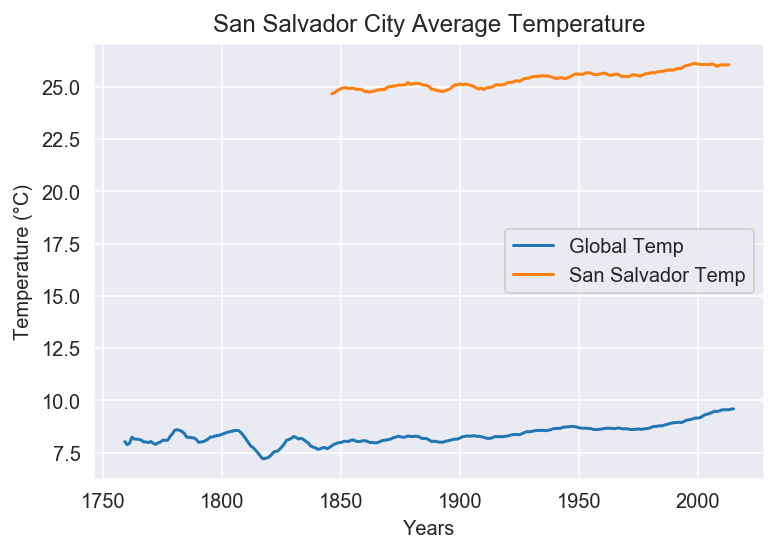

In [39]:
#Local data = San Salvador
plt.plot(globaltemp["year"],globaltemp["rollingAverage"], label='Global Temp')
plt.plot(df_salvador["year"],df_salvador["rollingAverage"],label='San Salvador Temp')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.title("San Salvador City Average Temperature")
plt.show()

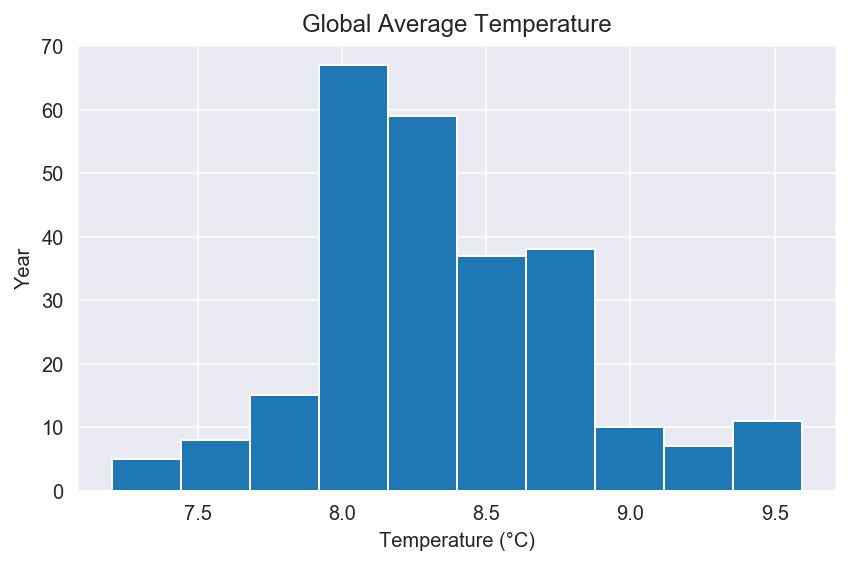

In [42]:
plt.subplot()
plt.hist(globaltemp['rollingAverage'], bins = 10)
plt.ylabel('Year')
plt.xlabel('Temperature (°C)')
plt.title('Global Average Temperature')
plt.tight_layout()
plt.show()

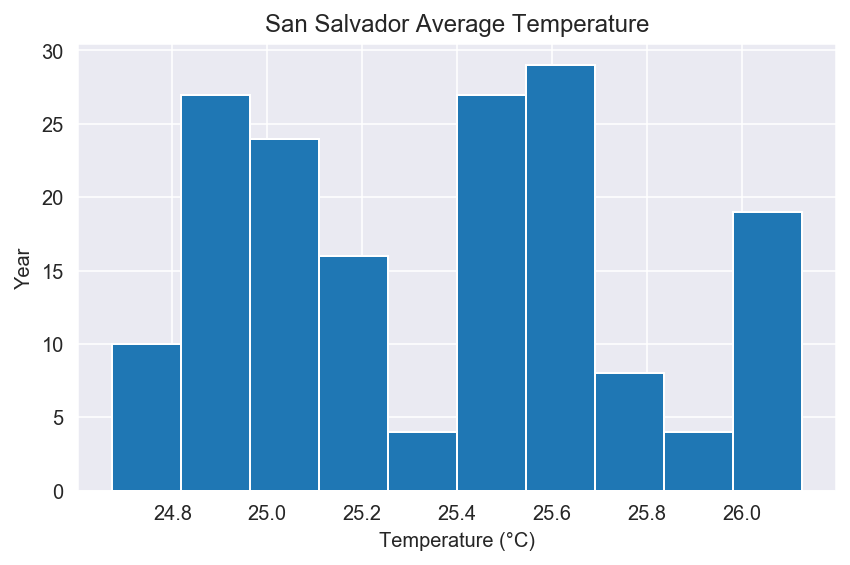

In [43]:
plt.subplot()
plt.hist(df_salvador['rollingAverage'], bins = 10)
plt.ylabel('Year')
plt.xlabel('Temperature (°C)')
plt.title('San Salvador Average Temperature')
plt.tight_layout()
plt.show()

## 6 - Results Discusion

* Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

    * There is a clear uptrend visible, in the city of San Salvador and also globally

* “How do the changes in your city’s temperatures over time compare to the changes in the global average?”

    * Changes are quite similar; both are in the range of 3 Celsius.    
    
* What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

    * Based on the outcomes listed in section 5, the world is getting hotter.Based on the outcomes above, the world is getting hotter. There is a visible trend in the upward direction, during the last 150 years.